In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

In [35]:
import matplotlib as mpl

In [36]:
mpl.rcParams['figure.autolayout'] = True
#mpl.rcParams

In [37]:
def permutate_values(Yp, Y, m):
    d = {}
    for yp,y in zip(Yp, Y):
        c = d.setdefault((yp,y), 0)
        d[(yp,y)] = c+1
    print(d)
    values = np.array(list(d.values()))
    keys = list(d.keys())
    indices = list(np.argsort(values))
    keys = [keys[indices[-i]] for i in range(1,m+1)]
    print(keys)
    d = dict(keys)
    for i in range(len(Y)):
        yp = Yp[i]
        Yp[i] = d[yp]

In [38]:
iris = pd.read_csv("data/iris.data")

In [39]:
cls_seq = iris["cls"]
cls_names = list(cls_seq.unique())
cls_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [115]:
Y = np.array([cls_names.index(name)+1 for name in cls_seq])
X = np.c_[iris["sl"],iris["sw"],iris["pl"],iris["pw"]]

pca = PCA(2)
X2 = pca.fit_transform(X)
X2 = np.ascontiguousarray(X2)

In [116]:
I1 = (Y == 1)
I2 = (Y == 2)
I3 = (Y == 3)

In [117]:
avrfunc = averager_it(func.QuantileFunc(0.94, func.Sqrt(0.001)))
avrfunc = avragg.ParameterizedAverage(func.WinsorizedSmoothFunc(func.Sqrt(0.001)), avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, 3, 
                                    tol=1.0e-9, n_iter=1000, n_step=20)

In [118]:
hcd.fit(X)

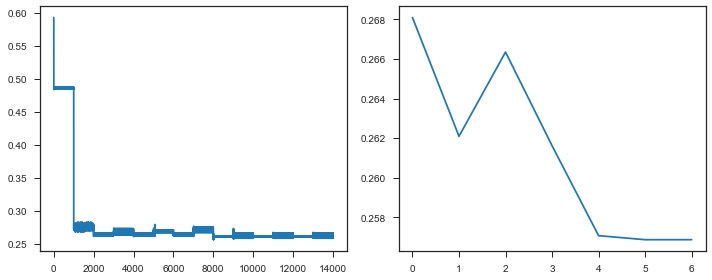

In [119]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hcd.dvals)
plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

In [120]:
Y_p = np.array(hcd.evaluate(X))
permutate_values(Y_p, Y, 3)
print(accuracy_score(Y, Y_p))

{(1, 1): 50, (2, 2): 48, (0, 2): 2, (0, 3): 48, (2, 3): 2}
[(1, 1), (0, 3), (2, 2)]
0.9733333333333334


In [121]:
II = (Y == Y_p)
ec1 = [('w' if b else 'k') for a, b in zip(I1, II) if a]
ec2 = [('w' if b else 'k') for a, b in zip(I2, II) if a]
ec3 = [('w' if b else 'k') for a, b in zip(I3, II) if a]

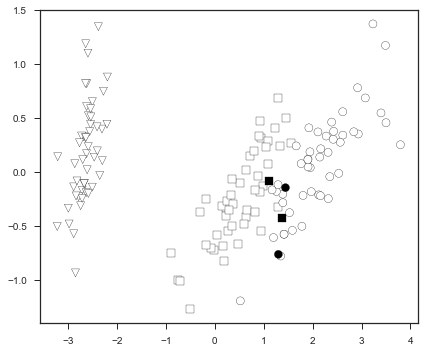

In [123]:
plt.figure(figsize=(6,5))
plt.scatter(X2[I1,0], X2[I1,1], c=ec1, edgecolors='k', marker='v', s=64)
plt.scatter(X2[I2,0], X2[I2,1], c=ec2, edgecolors='k', marker='s', s=64)
plt.scatter(X2[I3,0], X2[I3,1], c=ec3, edgecolors='k', marker='o', s=64)
plt.show()

### Среднее арифметическое

In [88]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, 3, 
                                    tol=1.0e-9, n_iter=1000, n_step=100)

In [89]:
km.fit(X)

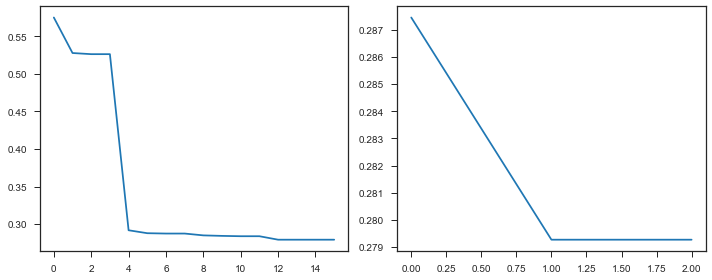

In [90]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.dvals)
plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

In [91]:
Y2_p = np.array(km.evaluate(X))
permutate_values(Y2_p, Y, 3)
print(accuracy_score(Y, Y2_p))

{(1, 1): 50, (2, 2): 50, (0, 3): 42, (2, 3): 8}
[(2, 2), (1, 1), (0, 3)]
0.9466666666666667
